In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import os
import matplotlib.pyplot as plt
from numpy import exp, abs, log
import pickle
from metrics import *

import universal as up
from universal import tools, algos
from universal.algos import *

<AxesSubplot:>

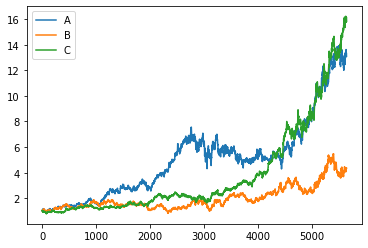

In [2]:
data = tools.dataset('nyse_o')

# plot first three of them as example
data.iloc[:,:3].plot()

In [3]:
data

,A,B,C,D,E,F,G,H,I,J,...,[,\,],^,_,`,a,b,c,d
0,1.015150,1.027650,1.041830,1.020830,1.006370,1.049380,1.008470,1.019830,1.054260,0.997510,...,1.031480,1.033770,1.010180,1.014950,1.007750,1.005260,1.011760,1.005780,0.996970,0.997520
1,1.030306,1.069126,1.030422,1.015624,1.011150,0.999996,1.016941,1.028325,1.100774,1.002498,...,1.040743,1.036365,1.022898,1.014950,1.009685,1.005260,1.031368,1.015415,0.987878,0.999994
2,1.030306,1.043777,1.007608,1.013024,0.996822,0.987646,1.014114,1.022659,1.069765,1.002498,...,1.020375,0.994807,1.020351,0.986714,0.996115,0.989467,1.003913,1.015415,1.015153,0.997514
3,1.055559,1.050687,1.034229,1.015627,1.015931,0.987646,1.008465,1.029746,1.069765,1.002498,...,1.031487,1.031167,1.033075,0.983389,1.003864,1.005259,1.003913,1.017345,1.018188,1.019788
4,1.088281,1.034559,1.038035,1.020837,1.019111,1.037029,1.036713,1.033999,1.131779,1.019951,...,1.042596,1.025970,1.027982,0.970103,1.015489,1.002625,1.019604,1.032757,1.030305,1.029690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,13.363088,4.332372,15.975170,16.710408,13.384216,52.126458,8.800101,2.964797,14.203320,13.998756,...,14.277373,6.064718,16.126495,53.804543,6.914765,15.476528,42.562995,4.278911,6.303800,5.388019
5647,13.363088,4.317685,15.849925,16.710408,13.277142,52.126458,8.760325,2.949321,13.872951,13.998756,...,14.200560,6.055197,15.705755,53.468802,6.945329,15.613031,41.856024,4.262181,6.332986,5.427513
5648,13.233333,4.303005,15.787317,16.806159,13.250322,52.126458,8.680693,2.980289,13.212321,13.959420,...,14.219731,6.026677,15.705755,52.965126,6.960608,15.749645,41.856024,4.228765,6.362182,5.388055
5649,13.136068,4.332394,15.787317,16.949852,13.357385,52.394388,8.640849,3.019003,13.460052,14.077377,...,14.315714,6.007692,15.775803,53.804624,6.945295,15.795161,42.421499,4.195316,6.537269,5.407775


In [4]:
df_close = log(data)
ll = df_close.shape[0]

for i in list(range(1, ll))[::-1]:
    df_close.iloc[i] -= df_close.iloc[i-1]

In [5]:
df_close

,A,B,C,D,E,F,G,H,I,J,...,[,\,],^,_,`,a,b,c,d
0,0.015036,0.027275,0.040979,0.020616,0.006350,0.048200,0.008434,0.019636,0.052839,-0.002493,...,0.030995,0.033212,0.010129,0.014839,0.007720,0.005246,0.011691,0.005763,-0.003035,-0.002483
1,0.014820,0.039567,-0.011010,-0.005113,0.004739,-0.048203,0.008365,0.008295,0.043174,0.004988,...,0.008940,0.002507,0.012511,0.000000,0.001918,0.000000,0.019195,0.009534,-0.009162,0.002477
2,0.000000,-0.023996,-0.022389,-0.002563,-0.014271,-0.012427,-0.002784,-0.005525,-0.028574,0.000000,...,-0.019764,-0.040926,-0.002493,-0.028214,-0.013531,-0.015835,-0.026981,0.000000,0.027236,-0.002483
3,0.024214,0.006598,0.026077,0.002567,0.018989,0.000000,-0.005586,0.006906,0.000000,0.000000,...,0.010831,0.035898,0.012393,-0.003376,0.007750,0.015834,0.000000,0.001898,0.002986,0.022084
4,0.030529,-0.015469,0.003673,0.005117,0.003125,0.048790,0.027625,0.004121,0.056352,0.017260,...,0.010712,-0.005053,-0.004942,-0.013602,0.011513,-0.002623,0.015509,0.015036,0.011830,0.009663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,0.009752,0.010218,0.003932,0.008633,0.004012,0.000000,-0.006209,0.000000,0.011691,0.014149,...,0.010811,0.011029,0.058184,0.007829,0.000000,0.035936,0.000000,0.011790,0.009307,0.018488
5647,0.000000,-0.003396,-0.007871,0.000000,-0.008032,0.000000,-0.004530,-0.005234,-0.023535,0.000000,...,-0.005395,-0.001571,-0.026436,-0.006260,0.004410,0.008781,-0.016749,-0.003918,0.004619,0.007303
5648,-0.009757,-0.003406,-0.003958,0.005714,-0.002022,0.000000,-0.009132,0.010445,-0.048791,-0.002814,...,0.001349,-0.004721,0.000000,-0.009465,0.002198,0.008712,0.000000,-0.007871,0.004599,-0.007297
5649,-0.007377,0.006807,0.000000,0.008514,0.008048,0.005127,-0.004601,0.012906,0.018576,0.008414,...,0.006727,-0.003155,0.004450,0.015726,-0.002202,0.002886,0.013420,-0.007941,0.027148,0.003653


In [6]:
cp = df_close
for phs in range(0, 100000):
    ntrain = 300
    ntest = 100
    win = 5
    nstock = df_close.shape[1]
    choice = np.arange(nstock)
    
    train_st = phs*ntest
    train_ed = test_st = phs*ntest+ntrain
    test_st = phs*ntest+ntrain-win
    test_ed = phs*ntest+ntrain+ntest
    if test_ed > ll:
        break
    print('Phase: %d'%phs)
    
    cp_train = cp.iloc[train_st:train_ed, :]
    cp_test = cp.iloc[test_st:test_ed, :]

    cp_trainx = np.zeros((ntrain - win, win * nstock))
    cp_trainy = np.zeros((ntrain - win, nstock))

    cov_train = np.cov(np.exp(cp_train.to_numpy().T))
    
    for i in range(win, ntrain):
        cp_trainy[i - win] = cp_train.to_numpy()[i]
        for s in range(nstock):
            cp_trainx[i - win, s * win:(s + 1) * win] = cp_train.to_numpy()[i - win:i, s]

    cp_testx = np.zeros((ntest, win * nstock))
    cp_testy = np.zeros((ntest, nstock))

    for i in range(win, ntest + win):
        cp_testy[i - win] = cp_test.to_numpy()[i]
        for s in range(nstock):
            cp_testx[i - win, s * win:(s + 1) * win] = cp_test.to_numpy()[i - win:i, s]

    np.savez('./stock_data/NYSE_stock_phase%02d_lb%d' % (phs, win), rt_trainx=cp_trainx, rt_trainy=cp_trainy,  \
             rt_valx=None, rt_valy=None,  \
             rt_testx=cp_testx, rt_testy=cp_testy, choice=choice, cov_train=cov_train)
    
#     print(np.min(cov_train))

Phase: 0
Phase: 1
Phase: 2
Phase: 3
Phase: 4
Phase: 5
Phase: 6
Phase: 7
Phase: 8
Phase: 9
Phase: 10
Phase: 11
Phase: 12
Phase: 13
Phase: 14
Phase: 15
Phase: 16
Phase: 17
Phase: 18
Phase: 19
Phase: 20
Phase: 21
Phase: 22
Phase: 23
Phase: 24
Phase: 25
Phase: 26
Phase: 27
Phase: 28
Phase: 29
Phase: 30
Phase: 31
Phase: 32
Phase: 33
Phase: 34
Phase: 35
Phase: 36
Phase: 37
Phase: 38
Phase: 39
Phase: 40
Phase: 41
Phase: 42
Phase: 43
Phase: 44
Phase: 45
Phase: 46
Phase: 47
Phase: 48
Phase: 49
Phase: 50
Phase: 51
Phase: 52
